In [1]:
import sklearn
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn import neural_network
from sklearn.model_selection import train_test_split
import pandas as pd
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
import random
from sklearn.metrics import roc_curve,auc

In [3]:
df= pd.read_csv("Combined Wine.csv")
df.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red


In [4]:
target_column = ['Type'] 
predictors = ['fixed acidity','volatile acidity' ,'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

In [5]:
data=df[predictors].to_numpy()
label=df[target_column].to_numpy()
data[0,]

array([ 7.4   ,  0.7   ,  0.    ,  1.9   ,  0.076 , 11.    , 34.    ,
        0.9978,  3.51  ,  0.56  ,  9.4   ])

In [6]:
labels= (label=="Red")
labels.shape

(6497, 1)

In [7]:
random.seed(123)
train_X, test_X, train_Y,test_Y=train_test_split(data, labels, test_size=0.25, random_state=40)
train_Y= train_Y.flatten()
test_Y=test_Y.flatten()

In [8]:
mlp1 = MLPClassifier(hidden_layer_sizes=(2,1), activation='relu', solver='adam', max_iter=1500)

mlp2 = MLPClassifier(hidden_layer_sizes=(5,8,5), activation='relu', solver='adam', max_iter=1000)


In [9]:
train_X_norm= (train_X - train_X.mean(axis=0,keepdims=True))/train_X.std(axis=0,keepdims=True)
test_X_norm= (test_X - test_X.mean(axis=0,keepdims=True))/test_X.std(axis=0,keepdims=True)

In [10]:
train_X_norm.shape

(4872, 11)

In [17]:
X_data=train_X_norm[0:41,:]
Y_data=train_Y[0:41]
k=41
size=[]
train_error1=[]
train_error2=[]
train_error3=[]
train_error4=[]
test_error1=[]
test_error2=[]
test_error3=[]
test_error4=[]

for i in range(116):
    mod=mlp1.fit(X_data,Y_data)
    #train_error1.append(sklearn.metrics.log_loss(Y_data,mod.predict_proba(X_data)[:,0]))
    #test_error1.append(sklearn.metrics.log_loss(test_Y,mod.predict_proba(test_X_norm)[:,0]))
    train_error1.append(1-mod.score(X_data,Y_data))
    test_error1.append(1-mod.score(test_X_norm,test_Y))
    size.append(k+1)
    k=k+42
    X_data=train_X_norm[0:k,:]
    Y_data=train_Y[0:k]

C:\Users\Rui Li\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rui Li\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


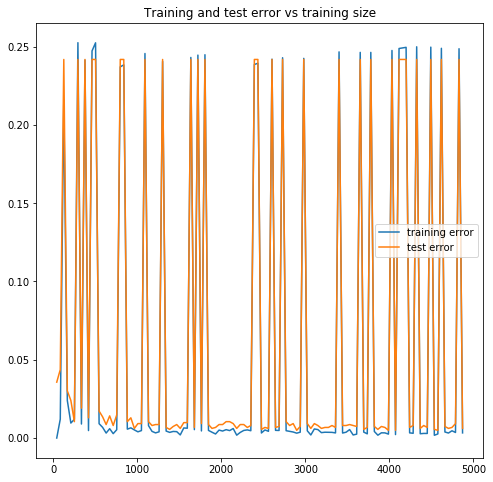

In [13]:
plt.figure(figsize=(8, 8))
plt.subplots_adjust()
plt.title("Training and test error vs training size")
plt.plot(size,train_error1,label="training error")
plt.plot(size,test_error1,label="test error")
plt.legend()
plt.show()

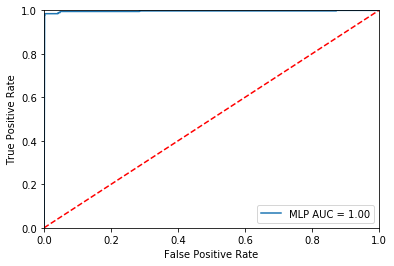

In [12]:
sklearn.metrics.confusion_matrix(test_Y,mod.predict(test_X_norm))
fpr2, tpr2, threshold = roc_curve(test_Y, mod.predict_proba(test_X_norm)[:,1])
roc_auc2= auc(fpr2, tpr2)

plt.figure()
plt.plot(fpr2, tpr2, label = 'MLP AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [15]:
sklearn.metrics.log_loss(["spam", "ham", "ham", "spam"],[.1, .9, .8, .35])

1.8161075557302175